In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [27]:
automobile_df = pd.read_csv('datasets/processed-auto-mpg.csv')
automobile_df.sample(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
307,27.2,4,135.0,84,2490,15.7,40
189,24.0,4,107.0,90,2430,14.5,51
360,21.5,6,231.0,115,3245,15.4,42
15,13.0,8,400.0,175,5140,12.0,50
185,12.0,8,455.0,225,4951,11.0,48
137,15.0,8,304.0,150,3892,12.5,49
204,15.0,8,350.0,165,3693,11.5,51
290,21.0,6,199.0,90,2648,15.0,51
354,36.0,4,120.0,88,2160,14.5,39
144,32.0,4,71.0,65,1836,21.0,47


In [28]:
result_dict = {}

In [29]:
def build_model(regression_fn,
               X_cols,
               Y_col,
               dataset,
               test_frac=0.2,
               preprocess_fn=None,
               show_plot_Y=False,
               show_plot_scatter=False):
    X = dataset[X_cols]
    Y = dataset[Y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training score : ", model.score(x_train, y_train))
    print("Test score : ", r2_score(y_test, y_pred))    
    
    if show_plot_Y==True:
        fix, ax = plt.subplots(figsize=(12,8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')        
        
        plt.ylabel(Y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter==True:
        fix, ax = plt.subplots(figsize=(12,8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')

        plt.legend('Predicted line', 'Observed data')
        plt.show()
        
    return {
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [30]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score: ', result_dict[key]['training_score'])
        print('Test score: ', result_dict[key]['test_score'])
        print()

In [31]:
def linear_reg(x_train, y_train):
    model=LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training score :  0.7041922539427455
Test score :  0.6426209418571263


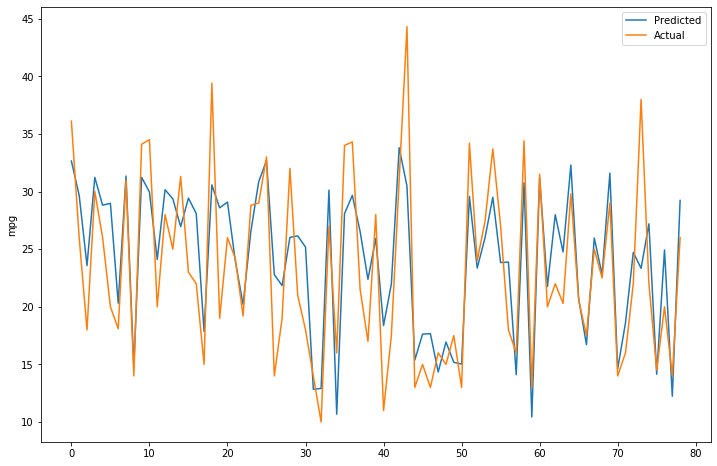

In [32]:
result_dict['mpg - single linear'] = build_model(linear_reg,
                                        ['weight'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

Training score :  0.7140301126388064
Test score :  0.6727802489888413


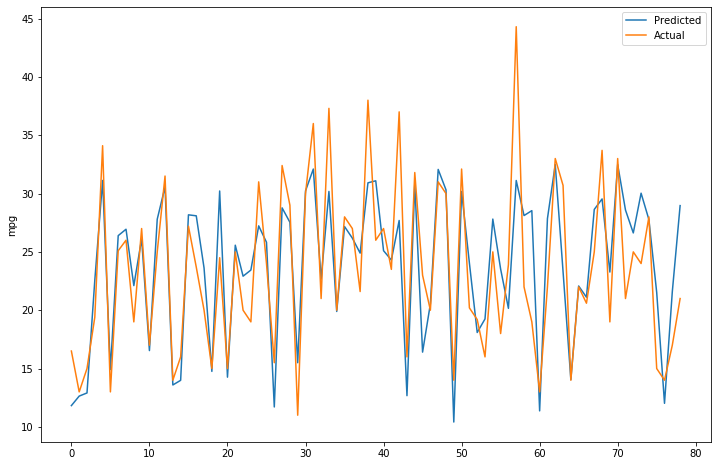

In [33]:
result_dict['mpg - kitchen_sink_linear'] = build_model(linear_reg,
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

Training score :  0.7046182877187633
Test score :  0.7114131222065669


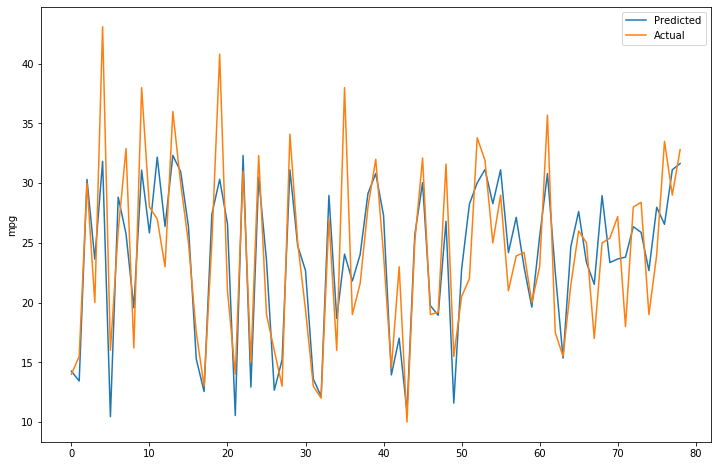

In [34]:
result_dict['mpg - parsimonious linear'] = build_model(linear_reg,
                                        [
                                        'horsepower',
                                        'weight'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

In [35]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model=Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training score :  0.7158519562525958
Test score :  0.6567320190863877


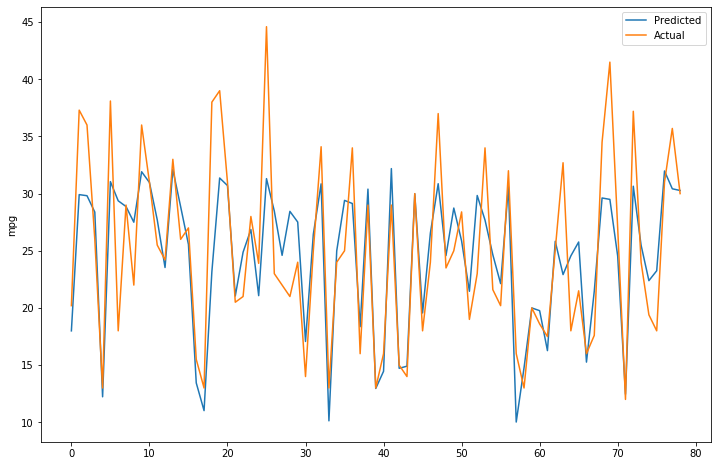

In [36]:
result_dict['mpg - kitchen_sink_lasso'] = build_model(lasso_reg,
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

In [37]:
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model=Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training score :  0.6907158021742089
Test score :  0.6500727726653275


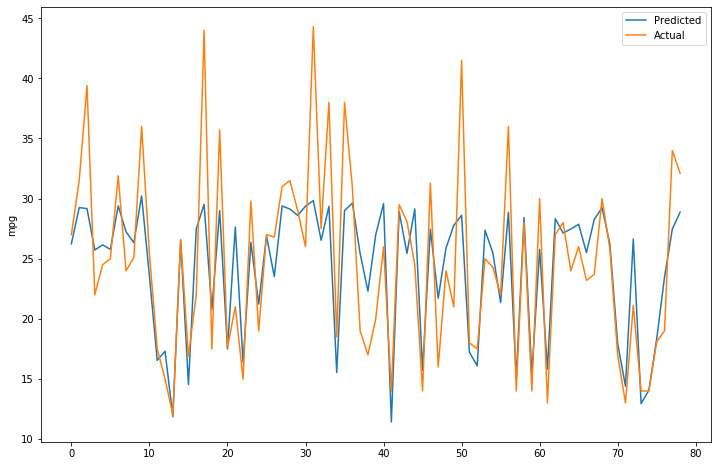

In [38]:
result_dict['mpg - kitchen_sink_ridge'] = build_model(ridge_reg,
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

In [39]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, 
                    normalize=False, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):
    print("Equivalent to: ", equivalent_to)
    model=ElasticNet(alpha=alpha, normalize=normalize, l1_ratio=l1_ratio, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

In [40]:
from functools import partial

Equivalent to:  OLS
Training score :  0.7170405249553837
Test score :  0.6617411706556048


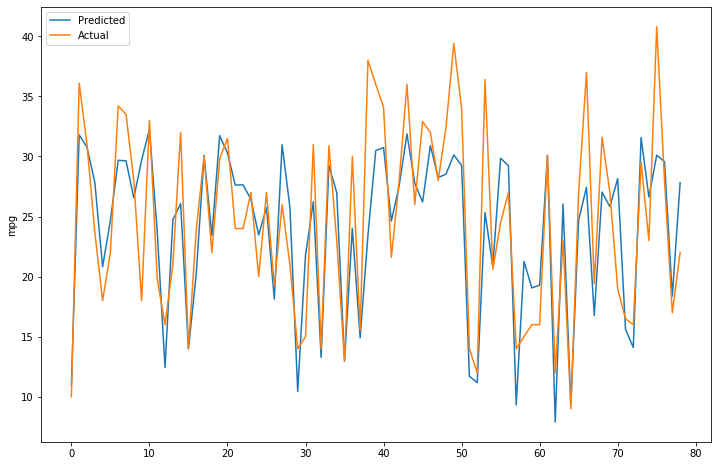

In [41]:
result_dict['mpg - kitchen_sink_elasticnet_OLS'] = build_model(partial(elastic_net_reg, alpha=0, equivalent_to="OLS"),
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

Equivalent to:  Lasso
Training score :  0.6885288285636623
Test score :  0.7800280714574629


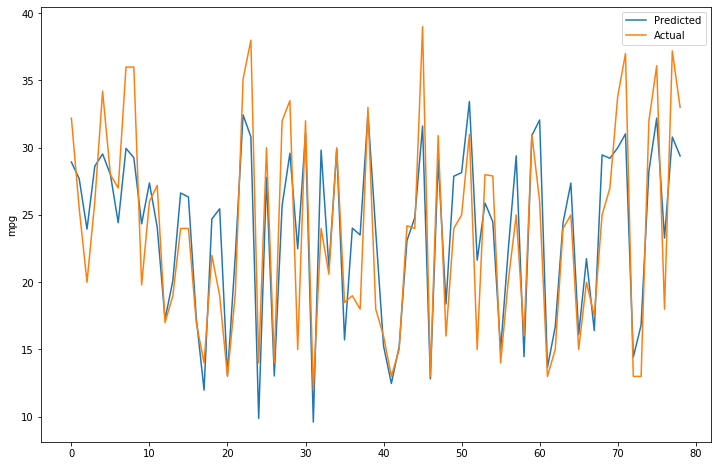

In [42]:
result_dict['mpg - kitchen_sink_elasticnet_Lasso'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=1,
                                                                         equivalent_to="Lasso"),
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

Equivalent to:  Ridge
Training score :  0.7111013271259568
Test score :  0.6859245053569388


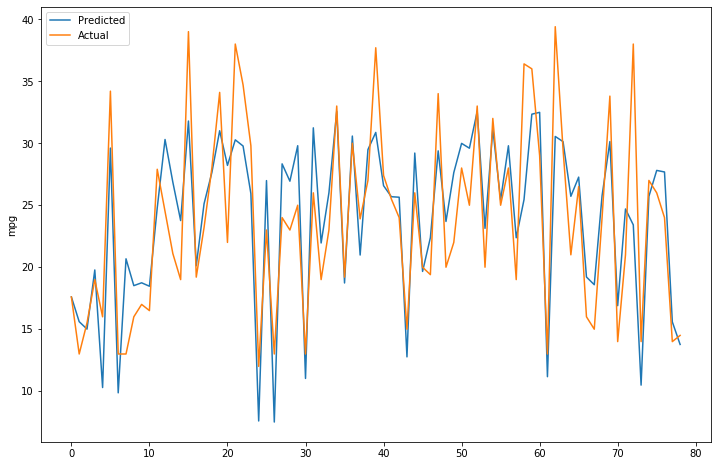

In [47]:
result_dict['mpg - kitchen_sink_elasticnet_Ridge'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0,
                                                                         equivalent_to="Ridge"),
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

Equivalent to:  Elastic Net
Training score :  0.7087794888241595
Test score :  0.6966917521256641


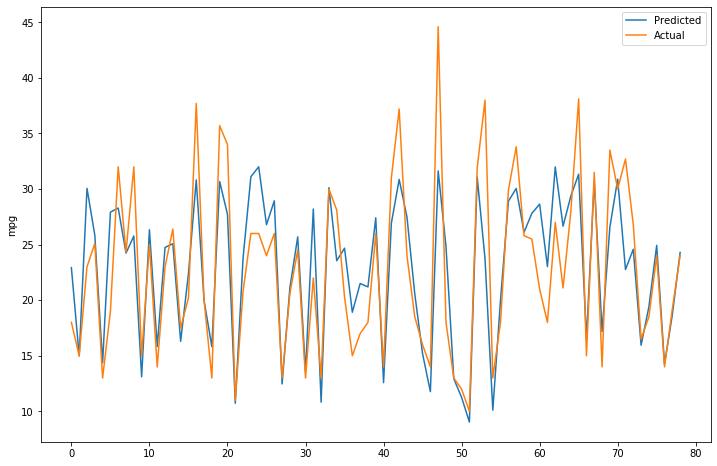

In [46]:
result_dict['mpg - kitchen_sink_elasticnet'] = build_model(partial(elastic_net_reg, alpha=1, l1_ratio=0.5),
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

In [49]:
def svr_reg(x_train, y_train, kernel='linear',epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training score :  0.7053982184760843
Test score :  0.6541965246254566


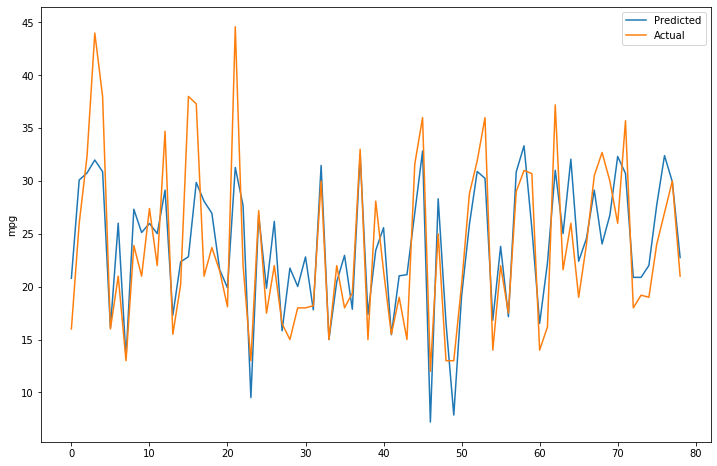

In [51]:
result_dict['mpg - kitchen_sink_svr'] = build_model(svr_reg,
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)

In [53]:
def k_neighbors_reg(x_train, y_train, k=10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    
    return model

Training score :  0.7595439230439037
Test score :  0.7146538451886735


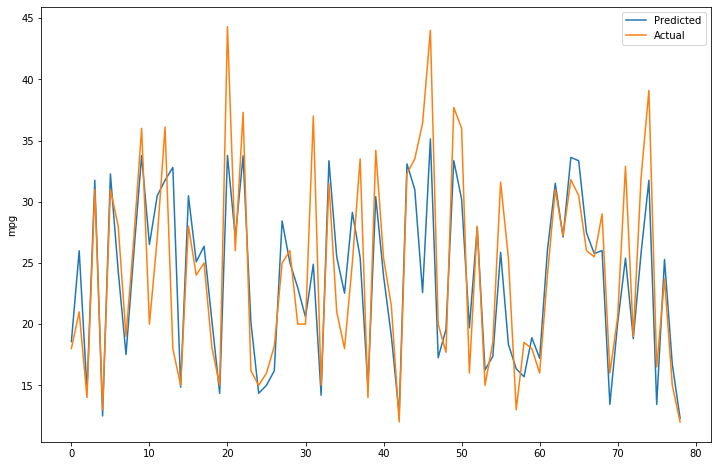

In [54]:
result_dict['mpg - kitchen_sink_kneighbors'] = build_model(k_neighbors_reg,
                                        ['cylinders',
                                        'displacement',
                                        'horsepower',
                                        'weight',
                                        'acceleration'],
                                         'mpg',
                                         automobile_df,
                                         show_plot_Y=True)